In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


import matplotlib.pyplot as plt
%matplotlib inline  

from PIL import Image
import glob

In [47]:
train_directory = r'images/train'
validate_directory = r'images/validate'
test_directory = r'images/test'

In [155]:
image_height, image_width = 64,64
batch_size = 20
seed = 1

train_dg = ImageDataGenerator(
  rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

validate_dg = ImageDataGenerator(
    rescale=1./255
)

train_gen = train_dg.flow_from_directory(
    train_directory,
    target_size=(image_height,image_width),
    batch_size=20,
    class_mode='categorical',
)

validate_gen = validate_dg.flow_from_directory(
    validate_directory,
    target_size=(image_height,image_width),
    batch_size=20,
    class_mode='categorical',
)

class_names=['banana','brocolli','croissant','pasta','pork','rice']

Found 2465 images belonging to 6 classes.
Found 518 images belonging to 6 classes.


In [126]:
def plots(img, figsize=(16,16), rows=4, interp=False, titles=None):
    f=plt.figure(figsize=figsize)
    cols = len(img)//rows if len(img) % 2 == 0 else len(img)//rows + 1
    for i in range(len(img)):
        sp = f.add_subplot(rows,cols, i+1)
        sp.axis('Off')
        sp.set_title(class_names[titles[i].tolist().index(1)], fontsize=16)
        plt.imshow(img[i])

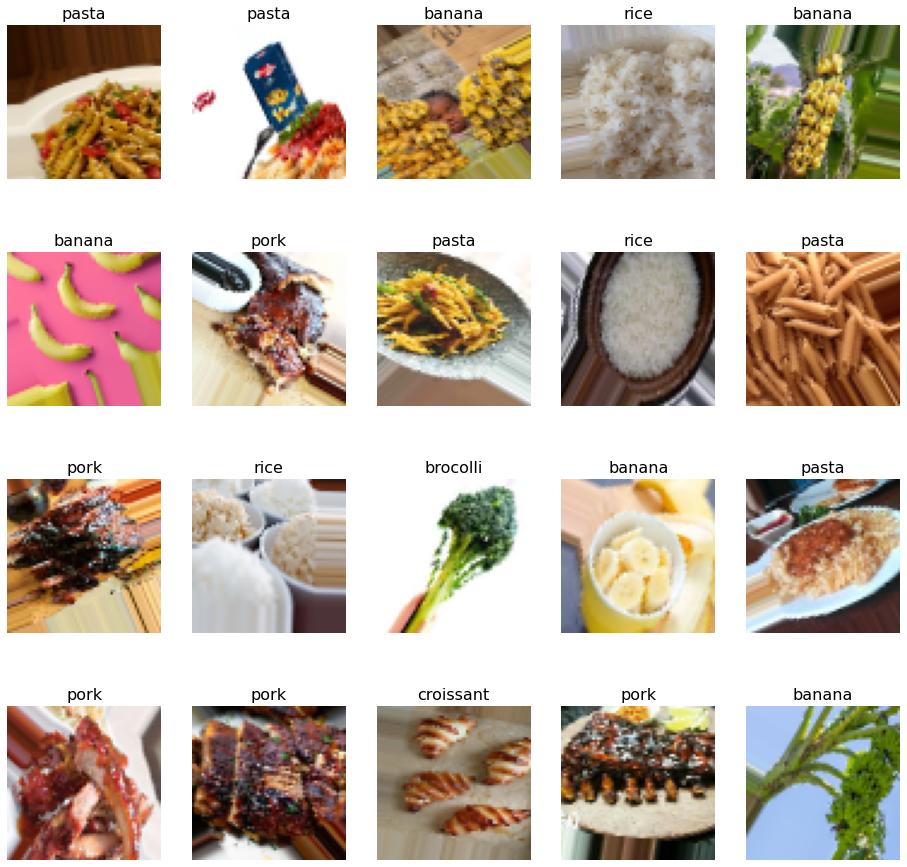

In [127]:
imgs, labels = next(train_gen)
plots(imgs,titles=labels)

In [157]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(image_width,image_height,3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [158]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [159]:
history = model.fit(
    train_gen,
    steps_per_epoch = 123,
    epochs=10,
    validation_data=validate_gen,
    validation_steps=25
)

Epoch 1/10
123/123 [==============================] - 28s 225ms/step - loss: 1.4182 - accuracy: 0.4769 - val_loss: 0.8833 - val_accuracy: 0.6520
Epoch 2/10
123/123 [==============================] - 28s 224ms/step - loss: 0.9415 - accuracy: 0.6258 - val_loss: 0.9380 - val_accuracy: 0.6380
Epoch 3/10
123/123 [==============================] - 27s 223ms/step - loss: 0.8940 - accuracy: 0.6732 - val_loss: 0.8269 - val_accuracy: 0.6740
Epoch 4/10
123/123 [==============================] - 28s 226ms/step - loss: 0.7966 - accuracy: 0.7067 - val_loss: 0.8208 - val_accuracy: 0.6880
Epoch 5/10
123/123 [==============================] - 28s 224ms/step - loss: 0.8177 - accuracy: 0.6994 - val_loss: 0.7790 - val_accuracy: 0.6980
Epoch 6/10
123/123 [==============================] - 28s 224ms/step - loss: 0.7759 - accuracy: 0.7170 - val_loss: 0.8101 - val_accuracy: 0.6900
Epoch 7/10
123/123 [==============================] - 27s 223ms/step - loss: 0.7776 - accuracy: 0.7076 - val_loss: 0.7938 - val_ac

In [142]:
model.save("model.t1")

INFO:tensorflow:Assets written to: model.t1\assets


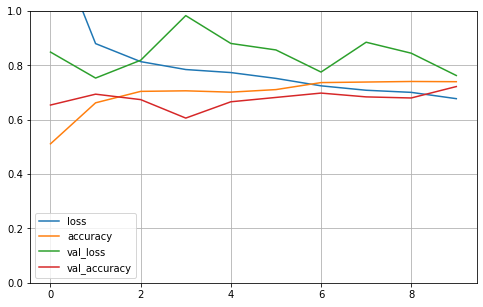

In [144]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
kernelSizes = [3,5,7,9,11]

for ks in kernelSizes:
    model = models.Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=(ks,ks),activation='relu',input_shape=(image_width,image_height,3)))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    from tensorflow.keras import optimizers
    model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
    history = model.fit(
    train_gen,
    steps_per_epoch = 123,
    epochs=10,
    validation_data=validate_gen,
    validation_steps=25
)
    print("kernel Size:", ks)